# Step 3.2: GitHub Log Analysis

In [1]:
import pandas as pd 
import os
import csv
import re
import json
from collections import Counter
from os import listdir
results_dir = "/home/notebooks/ProjectAnalysis/GitHubProyectsAnalysis/results/"
import matplotlib.pyplot as plt

In [2]:
def getSummary(project_name, commit_history):
    summary = {}
    summary['Project'] = project_name
    summary["Total"] = 0
    summary["Success"] = 0
    summary["Fail"] = 0
    
    summary['MavenSuccess'] = 0
    summary['MavenFail'] = 0
    summary['GradleSuccess'] = 0
    summary['GradleFail'] = 0
    summary['AntSuccess'] = 0
    summary['AntFail'] = 0
    summary['NoBuildSystem'] = 0
    summary['Errors'] = []
    
    
    for result in commit_history:
        
        summary["Total"] += 1
        
        if result['BUILD_STATUS'] == 'SUCCESS':
            
            summary["Success"] += 1
        
            if result['BUILD_SYSTEM'] == 'Maven':
                summary['MavenSuccess'] += 1
            if result['BUILD_SYSTEM'] == 'Gradle':
                summary['GradleSuccess'] += 1
            if result['BUILD_SYSTEM'] == 'Ant':
                summary['AntSuccess'] += 1
                
        else: # FAILED BUILDS
            
            if result['ERROR'] == 'No build system detected':
                summary['NoBuildSystem'] += 1
            
            summary["Fail"] += 1
            
            if result['BUILD_SYSTEM'] == 'Maven':
                summary['MavenFail'] += 1
            if result['BUILD_SYSTEM'] == 'Gradle':
                summary['GradleFail'] += 1
            if result['BUILD_SYSTEM'] == 'Ant':
                summary['AntFail'] += 1
#             if result['BUILD_SYSTEM'] == 'NOT_FOUND':
#                 summary['NoBuildSystem'] += 1
            
            action = result['ACTION']
            if action not in ['Resolution', 'Parsing', 'Compilation', 'Other']:
                if result['ERROR'] == 'Timeout': 
                    action = 'Resolution'
                else:
                    action = 'Other'
                
            summary['Errors'].append((result['BUILD_SYSTEM'], result['ERROR'], action))
                
    return summary

In [3]:
projects = [f for f in listdir(results_dir)]
results = {}

all_projects_summary = []
early_snapshots = []
intermediate_snapshots = []
recent_snapshots = []

for result_file in projects:
    with open(results_dir+result_file) as csvfile:
        project_name = result_file.split(".")[0]
        commit_history = list(csv.DictReader(csvfile))
        #results[project_name]= commit_history
        
        size = len(commit_history)
        q1 = int(0.25*size)
        q3 = int(0.75*size)
        
        all_projects_summary.append(getSummary(project_name, commit_history))

        early_snapshots.append(getSummary(project_name, commit_history[:q1]))

        intermediate_snapshots.append(getSummary(project_name, commit_history[q1+1:q3]))
        
        recent_snapshots.append(getSummary(project_name, commit_history[q3+1:]))


In [4]:
headers = ['Project', 'Total', 'Success', 'Fail', 'MavenSuccess', 'MavenFail', 'GradleSuccess', 'GradleFail', 'AntSuccess', 'AntFail', 'NoBuildSystem']

In [5]:
def piePlotPerBuildSystem(df):

    fig = plt.figure(figsize=(9,9))
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)
    summary_build_systems = df.select_dtypes(pd.np.number).sum()
    # Maven
    summary_build_systems[['MavenFail', 'MavenSuccess']].plot.pie(title="Maven",autopct = "%.2f%%", ax=ax1, colors = ['red', 'green'])
    # Gradle
    summary_build_systems[['GradleFail', 'GradleSuccess']].plot.pie(title="Gradle", autopct = "%.2f%%", ax=ax2, colors = ['red', 'green'])
    # Ant
    summary_build_systems[['AntFail', 'AntSuccess']].plot.pie(title="Ant", autopct = "%.2f%%", ax=ax3, colors = ['red', 'green'])

## 1. Projects Summary - All snapshots

In [6]:
summary_df = pd.DataFrame(all_projects_summary)
summary_df[headers]

Project  Total  Success  Fail  MavenSuccess  MavenFail  \
0                   zxing   3527      856  2671           856        167   
1                wiremock   1827       10  1817             0          0   
2         incubator-pinot   6915     1594  5321          1594       5309   
3                  junit4   2432     1125  1307          1125         20   
4   httpcomponents-client   3119     1944  1175          1944        970   
5                    nifi   5786        0  5786             0       4742   
6               powermock   1607      606  1001           596        817   
7              bookkeeper   2258      250  2008           250       1980   
8               Twitter4J   2318      851  1467           851       1467   
9         spring-data-jpa   1407      535   872           535        871   
10             connectbot   1791        0  1791             0          0   
11            docker-java   1983      977  1006           977       1005   
12                    pig   3693      518  3175             0          0   
13               fastjson   3515     2677   838          2677        837   
14               opengrok   5155     2683  2472          2683       1450   
15                   Jest   1147      457   690           457        689   
16                   mina   2401     1218  1183          1218       1182   
17             javaparser   6495     5998   497          5580        450   
18                mockito   5251     2984  2267             0          0   
19           commons-lang   5724     4943   781          4051         33   
20                Hystrix   2109     1115   994             0          0   
21  json-schema-validator   2787     2407   380          2405        175   
22           swagger-core   3706     1798  1908          1798       1857   
23  spring-security-oauth   1383      535   848           535        847   
24                   jgit   7847     6723  1124          6723       1075   
25                 jacoco   1676        0  1676             0        826   
26              thymeleaf   1654        0  1654             0       1653   
27             quickstart   2139      986  1153           986        801   
28               kairosdb   1368      242  1126           242         35   
29                  log4j   3275      133  3142           133        486   
30           aws-sdk-java   2496     2231   265          2231        265   
31   elasticsearch-hadoop   1983        0  1983             0          0   
32                 jsprit   2093     1052  1041          1052        976   
33            java-client   1517      424  1093           424        315   
34            java-driver   1398      770   628           770        628   
35           assertj-core   2855     2435   420          2435        420   
36       jackson-databind   6475     1503  4972          1503       4972   

    GradleSuccess  GradleFail  AntSuccess  AntFail  NoBuildSystem  
0               0           0           0     2479             25  
1              10        1358           0        0            459  
2               0           0           0        0             12  
3               0           0           0     1280              7  
4               0           0           0      185             20  
5               0           0           0        0           1044  
6              10         184           0        0              0  
7               0           0           0        0             28  
8               0           0           0        0              0  
9               0           0           0        0              1  
10              0        1146           0      581             64  
11              0           0           0        0              1  
12              0           0         518     3174              1  
13              0           0           0        0              1  
14              0           0           0     1021              1  
15              0           0           0

Generate resume for Reproduction Experiment

In [7]:
summary_df[headers].to_csv('reproduction_experiment_buildability_summary.csv', index=False)  

In [8]:
summary_df.select_dtypes(pd.np.number).sum()

AntFail           11865
AntSuccess         3362
Fail              62532
GradleFail         8829
GradleSuccess      2587
MavenFail         37320
MavenSuccess      46631
NoBuildSystem      4518
Success           52580
Total            115112
dtype: int64

In [9]:
def report(data):
    error_list = []
    total_errors = len(data)
    for error_tuple in Counter(data).items():
        build_system, error, action = error_tuple[0]
        count = error_tuple[1]
        error_list.append((build_system, error, action, count))
    errors = sorted(error_list, key=lambda i: i[3], reverse=True)
    errors = pd.DataFrame(errors, columns = ["BuildSystem", "Error", "Action", "Count"])
    errors['%'] = errors.apply (lambda row: (row[3] / total_errors)*100, axis=1)
    print(errors[['Count', '%']].sum())
    return errors 

In [10]:
all_errors_df = report(summary_df["Errors"].sum())
all_errors_df

Count    62532.0
%          100.0
dtype: float64


BuildSystem                                              Error  \
0        Maven                        ArtifactResolutionException   
1        Maven                                            Timeout   
2          Ant                                    Other Ant error   
3        Maven                             MojoExecutionException   
4    NOT_FOUND                           No build system detected   
5       Gradle                                 Other Gradle error   
6        Maven                               MojoFailureException   
7          Ant                               UnknownHostException   
8       Gradle                 Could not resolve all dependencies   
9       Gradle  IOException: Server returned HTTP response cod...   
10         Ant                                     Compile failed   
11      Gradle                                            Timeout   
12       Maven                   PluginDescriptorParsingException   
13       Maven                                   ConnectException   
14       Maven                           ProjectBuildingException   
15       Maven                          PluginResolutionException   
16      Gradle                                  Permission denied   
17      Gradle                          Javadoc generation failed   
18      Gradle                                  Could not resolve   
19       Maven                           PluginContainerException   
20       Maven                                ModelParseException   
21       Maven                                  Other Maven error   
22      Gradle                                 Compilation failed   
23       Maven                             InternalErrorException   
24       Maven                       PluginConfigurationException   
25      Gradle                                    compile errors:   
26      Gradle                                Java 11 is required   
27       Maven                      DependencyResolutionException   

         Action  Count          %  
0    Resolution  14004  22.394934  
1    Resolution  10732  17.162413  
2         Other   7734  12.368068  
3         Other   6298  10.071643  
4         Other   4518   7.225101  
5         Other   3395   5.429220  
6         Other   3299   5.275699  
7    Resolution   3151   5.039020  
8    Resolution   1779   2.844943  
9    Resolution   1469   2.349197  
10  Compilation    980   1.567198  
11   Resolution    818   1.308130  
12      Parsing    757   1.210580  
13        Other    420   0.671656  
14        Other    411   0.657263  
15   Resolution    409   0.654065  
16        Other    377   0.602891  
17        Other    370   0.591697  
18   Resolution    304   0.486151  
19        Other    295   0.471758  
20      Parsing    213   0.340626  
21        Other    184   0.294249  
22  Compilation    183   0.292650  
23        Other    158   0.252671  
24        Other    135   0.215889  
25  Compilation     85   0.135930  
26        Other     49   0.078360  
27   Resolution      5   0.007996

In [11]:
all_errors_df.groupby('Action').sum().sort_values(by=['Count'], ascending=False)

Count          %
Action                       
Resolution   32671  52.246850
Other        27643  44.206166
Compilation   1248   1.995778
Parsing        970   1.551206

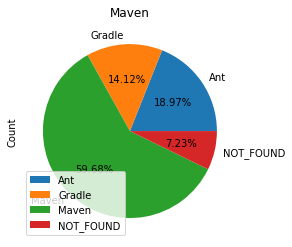

In [12]:
all_errors_df.groupby(['BuildSystem']).sum().plot.pie(y='Count',title="Maven",autopct = "%.2f%%")

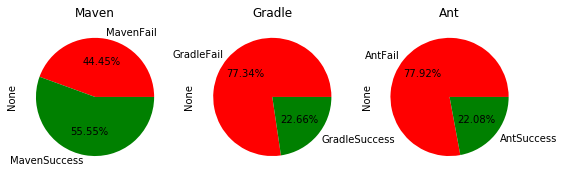

In [13]:
piePlotPerBuildSystem(summary_df)

## 2. Projects Summary - Early Snapshots

In [14]:
early_snapshots_df = pd.DataFrame(early_snapshots)
early_snapshots_df[headers]

Project  Total  Success  Fail  MavenSuccess  MavenFail  \
0                   zxing    881        0   881             0          0   
1                wiremock    456        0   456             0          0   
2         incubator-pinot   1728     1521   207          1521        195   
3                  junit4    608        0   608             0          0   
4   httpcomponents-client    779      334   445           334        240   
5                    nifi   1446        0  1446             0        402   
6               powermock    401      104   297           104        297   
7              bookkeeper    564      142   422           142        421   
8               Twitter4J    579        0   579             0        579   
9         spring-data-jpa    351       15   336            15        335   
10             connectbot    447        0   447             0          0   
11            docker-java    495       42   453            42        452   
12                    pig    923      514   409             0          0   
13               fastjson    878      115   763           115        762   
14               opengrok   1288      172  1116           172         94   
15                   Jest    286       74   212            74        211   
16                   mina    600       33   567            33        567   
17             javaparser   1623     1553    70          1515         60   
18                mockito   1312     1246    66             0          0   
19           commons-lang   1431      685   746             0          0   
20                Hystrix    527        0   527             0          0   
21  json-schema-validator    696      539   157           539        157   
22           swagger-core    926       48   878            48        827   
23  spring-security-oauth    345        0   345             0        344   
24                   jgit   1961     1271   690          1271        641   
25                 jacoco    419        0   419             0          0   
26              thymeleaf    413        0   413             0        412   
27             quickstart    534      202   332           202        152   
28               kairosdb    342        0   342             0          0   
29                  log4j    818        0   818             0          0   
30           aws-sdk-java    624      384   240           384        240   
31   elasticsearch-hadoop    495        0   495             0          0   
32                 jsprit    523      405   118           405         53   
33            java-client    379      315    64           315         20   
34            java-driver    349      147   202           147        202   
35           assertj-core    713      456   257           456        257   
36       jackson-databind   1618      287  1331           287       1331   

    GradleSuccess  GradleFail  AntSuccess  AntFail  NoBuildSystem  
0               0           0           0      856             25  
1               0           0           0        0            456  
2               0           0           0        0             12  
3               0           0           0      601              7  
4               0           0           0      185             20  
5               0           0           0        0           1044  
6               0           0           0        0              0  
7               0           0           0        0              1  
8               0           0           0        0              0  
9               0           0           0        0              1  
10              0           0           0      383             64  
11              0           0           0        0              1  
12              0           0         514      408              1  
13              0           0           0        0              1  
14              0           0           0     1021              1  
15              0           0           0

In [15]:
early_snapshots_df.select_dtypes(pd.np.number).sum()

AntFail           4745
AntSuccess        2445
Fail             18154
GradleFail        1026
GradleSuccess       38
MavenFail         9251
MavenSuccess      8121
NoBuildSystem     3132
Success          10604
Total            28758
dtype: int64

In [16]:
early_errors_df = report(early_snapshots_df["Errors"].sum())
early_errors_df

Count    18154.0
%          100.0
dtype: float64


BuildSystem                                              Error  \
0        Maven                        ArtifactResolutionException   
1          Ant                                    Other Ant error   
2        Maven                                            Timeout   
3    NOT_FOUND                           No build system detected   
4        Maven                             MojoExecutionException   
5          Ant                                     Compile failed   
6       Gradle  IOException: Server returned HTTP response cod...   
7        Maven                               MojoFailureException   
8          Ant                               UnknownHostException   
9       Gradle                                  Permission denied   
10       Maven                             InternalErrorException   
11       Maven                           ProjectBuildingException   
12       Maven                                ModelParseException   
13       Maven                                  Other Maven error   
14      Gradle                                 Other Gradle error   
15       Maven                      DependencyResolutionException   

         Action  Count          %  
0    Resolution   3593  19.791781  
1         Other   3394  18.695604  
2    Resolution   3153  17.368073  
3         Other   3132  17.252396  
4         Other   1682   9.265176  
5   Compilation    966   5.321141  
6    Resolution    644   3.547428  
7         Other    418   2.302523  
8    Resolution    385   2.120745  
9         Other    377   2.076677  
10        Other    156   0.859315  
11        Other    116   0.638978  
12      Parsing     98   0.539826  
13        Other     30   0.165253  
14        Other      5   0.027542  
15   Resolution      5   0.027542

In [17]:
early_errors_df.groupby('Action').sum().sort_values(by=['Count'], ascending=False)

Count          %
Action                       
Other         9310  51.283464
Resolution    7780  42.855569
Compilation    966   5.321141
Parsing         98   0.539826

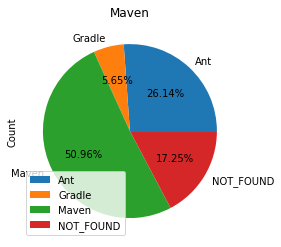

In [18]:
early_errors_df.groupby(['BuildSystem']).sum().plot.pie(y='Count',title="Maven",autopct = "%.2f%%")

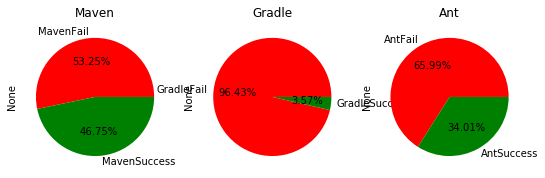

In [19]:
piePlotPerBuildSystem(early_snapshots_df)

## 3. Projects Summary - Intemediate Snapshots

In [20]:
intermediate_snapshots_df = pd.DataFrame(early_snapshots)
intermediate_snapshots_df[headers]

Project  Total  Success  Fail  MavenSuccess  MavenFail  \
0                   zxing    881        0   881             0          0   
1                wiremock    456        0   456             0          0   
2         incubator-pinot   1728     1521   207          1521        195   
3                  junit4    608        0   608             0          0   
4   httpcomponents-client    779      334   445           334        240   
5                    nifi   1446        0  1446             0        402   
6               powermock    401      104   297           104        297   
7              bookkeeper    564      142   422           142        421   
8               Twitter4J    579        0   579             0        579   
9         spring-data-jpa    351       15   336            15        335   
10             connectbot    447        0   447             0          0   
11            docker-java    495       42   453            42        452   
12                    pig    923      514   409             0          0   
13               fastjson    878      115   763           115        762   
14               opengrok   1288      172  1116           172         94   
15                   Jest    286       74   212            74        211   
16                   mina    600       33   567            33        567   
17             javaparser   1623     1553    70          1515         60   
18                mockito   1312     1246    66             0          0   
19           commons-lang   1431      685   746             0          0   
20                Hystrix    527        0   527             0          0   
21  json-schema-validator    696      539   157           539        157   
22           swagger-core    926       48   878            48        827   
23  spring-security-oauth    345        0   345             0        344   
24                   jgit   1961     1271   690          1271        641   
25                 jacoco    419        0   419             0          0   
26              thymeleaf    413        0   413             0        412   
27             quickstart    534      202   332           202        152   
28               kairosdb    342        0   342             0          0   
29                  log4j    818        0   818             0          0   
30           aws-sdk-java    624      384   240           384        240   
31   elasticsearch-hadoop    495        0   495             0          0   
32                 jsprit    523      405   118           405         53   
33            java-client    379      315    64           315         20   
34            java-driver    349      147   202           147        202   
35           assertj-core    713      456   257           456        257   
36       jackson-databind   1618      287  1331           287       1331   

    GradleSuccess  GradleFail  AntSuccess  AntFail  NoBuildSystem  
0               0           0           0      856             25  
1               0           0           0        0            456  
2               0           0           0        0             12  
3               0           0           0      601              7  
4               0           0           0      185             20  
5               0           0           0        0           1044  
6               0           0           0        0              0  
7               0           0           0        0              1  
8               0           0           0        0              0  
9               0           0           0        0              1  
10              0           0           0      383             64  
11              0           0           0        0              1  
12              0           0         514      408              1  
13              0           0           0        0              1  
14              0           0           0     1021              1  
15              0           0           0

In [21]:
intermediate_snapshots_df.select_dtypes(pd.np.number).sum()

AntFail           4745
AntSuccess        2445
Fail             18154
GradleFail        1026
GradleSuccess       38
MavenFail         9251
MavenSuccess      8121
NoBuildSystem     3132
Success          10604
Total            28758
dtype: int64

In [22]:
intermediate_errors_df = report(intermediate_snapshots_df["Errors"].sum())
intermediate_errors_df

Count    18154.0
%          100.0
dtype: float64


BuildSystem                                              Error  \
0        Maven                        ArtifactResolutionException   
1          Ant                                    Other Ant error   
2        Maven                                            Timeout   
3    NOT_FOUND                           No build system detected   
4        Maven                             MojoExecutionException   
5          Ant                                     Compile failed   
6       Gradle  IOException: Server returned HTTP response cod...   
7        Maven                               MojoFailureException   
8          Ant                               UnknownHostException   
9       Gradle                                  Permission denied   
10       Maven                             InternalErrorException   
11       Maven                           ProjectBuildingException   
12       Maven                                ModelParseException   
13       Maven                                  Other Maven error   
14      Gradle                                 Other Gradle error   
15       Maven                      DependencyResolutionException   

         Action  Count          %  
0    Resolution   3593  19.791781  
1         Other   3394  18.695604  
2    Resolution   3153  17.368073  
3         Other   3132  17.252396  
4         Other   1682   9.265176  
5   Compilation    966   5.321141  
6    Resolution    644   3.547428  
7         Other    418   2.302523  
8    Resolution    385   2.120745  
9         Other    377   2.076677  
10        Other    156   0.859315  
11        Other    116   0.638978  
12      Parsing     98   0.539826  
13        Other     30   0.165253  
14        Other      5   0.027542  
15   Resolution      5   0.027542

In [23]:
intermediate_errors_df.groupby('Action').sum().sort_values(by=['Count'], ascending=False)

Count          %
Action                       
Other         9310  51.283464
Resolution    7780  42.855569
Compilation    966   5.321141
Parsing         98   0.539826

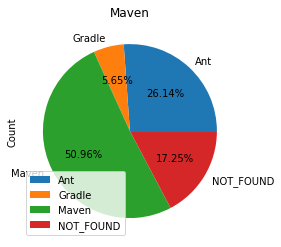

In [24]:
intermediate_errors_df.groupby(['BuildSystem']).sum().plot.pie(y='Count',title="Maven",autopct = "%.2f%%")

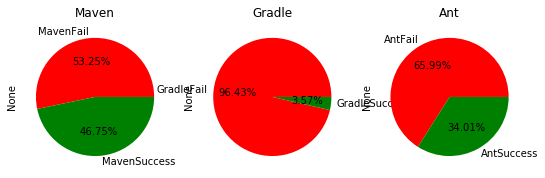

In [25]:
piePlotPerBuildSystem(intermediate_snapshots_df)

## 4. Projects Summary - Recent Snapshots

In [26]:
recent_snapshots_df = pd.DataFrame(recent_snapshots)
recent_snapshots_df[headers]

Project  Total  Success  Fail  MavenSuccess  MavenFail  \
0                   zxing    881      832    49           832         49   
1                wiremock    456       10   446             0          0   
2         incubator-pinot   1728        0  1728             0       1728   
3                  junit4    607      605     2           605          2   
4   httpcomponents-client    779      557   222           557        222   
5                    nifi   1446        0  1446             0       1446   
6               powermock    401      175   226           165         42   
7              bookkeeper    564        0   564             0        564   
8               Twitter4J    579      495    84           495         84   
9         spring-data-jpa    351      289    62           289         62   
10             connectbot    447        0   447             0          0   
11            docker-java    495       85   410            85        410   
12                    pig    923        4   919             0          0   
13               fastjson    878      874     4           874          4   
14               opengrok   1288      190  1098           190       1098   
15                   Jest    286      275    11           275         11   
16                   mina    600      325   275           325        274   
17             javaparser   1623     1612    11          1612         11   
18                mockito   1312      800   512             0          0   
19           commons-lang   1430     1430     0          1430          0   
20                Hystrix    527      519     8             0          0   
21  json-schema-validator    696      481   215           479         10   
22           swagger-core    926      829    97           829         97   
23  spring-security-oauth    345      327    18           327         18   
24                   jgit   1961     1961     0          1961          0   
25                 jacoco    418        0   418             0        418   
26              thymeleaf    413        0   413             0        413   
27             quickstart    534      319   215           319        215   
28               kairosdb    341      242    99           242         35   
29                  log4j    818      133   685           133        486   
30           aws-sdk-java    623      601    22           601         22   
31   elasticsearch-hadoop    495        0   495             0          0   
32                 jsprit    523      495    28           495         28   
33            java-client    379        0   379             0          0   
34            java-driver    349      129   220           129        220   
35           assertj-core    713      617    96           617         96   
36       jackson-databind   1618      280  1338           280       1338   

    GradleSuccess  GradleFail  AntSuccess  AntFail  NoBuildSystem  
0               0           0           0        0              0  
1              10         446           0        0              0  
2               0           0           0        0              0  
3               0           0           0        0              0  
4               0           0           0        0              0  
5               0           0           0        0              0  
6              10         184           0        0              0  
7               0           0           0        0              0  
8               0           0           0        0              0  
9               0           0           0        0              0  
10              0         447           0        0              0  
11              0           0           0        0              0  
12              0           0           4      919              0  
13              0           0           0        0              0  
14              0           0           0        0              0  
15              0           0           0

In [27]:
recent_snapshots_df.select_dtypes(pd.np.number).sum()

AntFail           1118
AntSuccess           4
Fail             13262
GradleFail        2676
GradleSuccess     1341
MavenFail         9403
MavenSuccess     14146
NoBuildSystem       65
Success          15491
Total            28753
dtype: int64

In [28]:
recent_errors_df = report(recent_snapshots_df["Errors"].sum())
recent_errors_df

Count    13262.0
%          100.0
dtype: float64


BuildSystem                                              Error  \
0        Maven                        ArtifactResolutionException   
1        Maven                             MojoExecutionException   
2        Maven                                            Timeout   
3       Gradle                                 Other Gradle error   
4          Ant                               UnknownHostException   
5        Maven                   PluginDescriptorParsingException   
6        Maven                          PluginResolutionException   
7       Gradle                 Could not resolve all dependencies   
8        Maven                               MojoFailureException   
9       Gradle                                  Could not resolve   
10       Maven                           ProjectBuildingException   
11       Maven                                   ConnectException   
12         Ant                                    Other Ant error   
13      Gradle  IOException: Server returned HTTP response cod...   
14       Maven                       PluginConfigurationException   
15      Gradle                          Javadoc generation failed   
16      Gradle                                            Timeout   
17   NOT_FOUND                           No build system detected   
18      Gradle                                Java 11 is required   
19       Maven                                ModelParseException   
20       Maven                                  Other Maven error   
21      Gradle                                 Compilation failed   

         Action  Count          %  
0    Resolution   3036  22.892475  
1         Other   2308  17.403107  
2    Resolution   2247  16.943146  
3         Other   1547  11.664907  
4    Resolution    919   6.929573  
5       Parsing    418   3.151862  
6    Resolution    409   3.083999  
7    Resolution    368   2.774845  
8         Other    311   2.345046  
9    Resolution    304   2.292264  
10        Other    258   1.945408  
11        Other    208   1.568391  
12        Other    199   1.500528  
13   Resolution    194   1.462826  
14        Other    135   1.017946  
15        Other    102   0.769115  
16   Resolution     95   0.716332  
17        Other     65   0.490122  
18        Other     49   0.369477  
19      Parsing     38   0.286533  
20        Other     35   0.263912  
21  Compilation     17   0.128186

In [29]:
recent_errors_df.groupby('Action').sum().sort_values(by=['Count'], ascending=False)

Count          %
Action                       
Resolution    7572  57.095461
Other         5217  39.337958
Parsing        456   3.438395
Compilation     17   0.128186

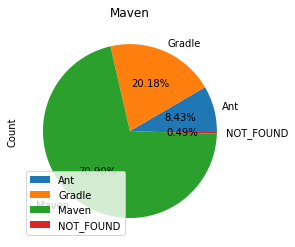

In [30]:
recent_errors_df.groupby(['BuildSystem']).sum().plot.pie(y='Count',title="Maven",autopct = "%.2f%%")

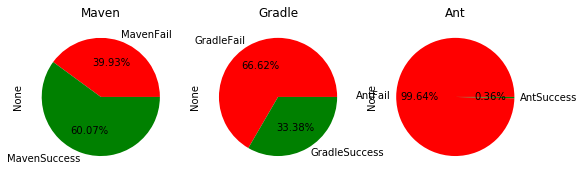

In [31]:
piePlotPerBuildSystem(recent_snapshots_df)

## 5. Errors per Build System

In [35]:
maven_errors  = []
ant_errors    = []
gradle_errors = []

maven_errors_complete  = []
ant_errors_complete    = []
gradle_errors_complete = []

for project in all_projects_summary:
    for error in project['Errors']:
        build_system = error[0]
        trace        = error[1]
        category     = error[2]
        if build_system == 'Maven':
            maven_errors.append(category)
            maven_errors_complete.append((trace, category))
        if build_system == 'Ant':
            ant_errors.append(category)
            ant_errors_complete.append((trace, category))
        if build_system == 'Gradle':
            gradle_errors.append(category)
            gradle_errors_complete.append((trace, category))

In [36]:
from collections import Counter

all_errors = maven_errors + ant_errors + gradle_errors

for build_system, errors in [("Maven",maven_errors), ("Ant",ant_errors), ("Gradle",gradle_errors), ("All", all_errors)]:
    counter = Counter(errors)
    print(build_system)
    print("   Resolution       {:.0f}".format(int(counter['Resolution'])))
    print("   Resolution (%)   {:.2f}".format(int(counter['Resolution'])*100/len(errors)))
    print("   Parsing          {:.0f}".format(int(counter['Parsing'])))
    print("   Parsing (%)      {:.2f}".format(int(counter['Parsing'])*100/len(errors)))
    print("   Compilation      {:.0f}".format(int(counter['Compilation'])))
    print("   Compilation (%)  {:.2f}".format(int(counter['Compilation'])*100/len(errors)))
    print("   Other            {:.0f}".format(int(counter['Other'])))
    print("   Other (%)        {:.2f}".format(int(counter['Other'])*100/len(errors)))

Maven
   Resolution       25150
   Resolution (%)   67.39
   Parsing          970
   Parsing (%)      2.60
   Compilation      0
   Compilation (%)  0.00
   Other            11200
   Other (%)        30.01
Ant
   Resolution       3151
   Resolution (%)   26.56
   Parsing          0
   Parsing (%)      0.00
   Compilation      980
   Compilation (%)  8.26
   Other            7734
   Other (%)        65.18
Gradle
   Resolution       4370
   Resolution (%)   49.50
   Parsing          0
   Parsing (%)      0.00
   Compilation      268
   Compilation (%)  3.04
   Other            4191
   Other (%)        47.47
All
   Resolution       32671
   Resolution (%)   56.32
   Parsing          970
   Parsing (%)      1.67
   Compilation      1248
   Compilation (%)  2.15
   Other            23125
   Other (%)        39.86
